<a href="https://colab.research.google.com/github/ZHAbotorabi/Strategy-Trading-Model/blob/main/Trading_Strategy_yfinance_TA_Lib_Backtrader_optuna_PyPortfolioOpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Market Data and Indicator Calculation in Python

You can use the following libraries for your financial data and indicator calculations:

* yfinance: To fetch market data.
* TA-Lib or pandas-ta: To calculate indicators.
* Alpha Vantage API: For real-time global data (optional).


For simplicity and speed, yfinance and pandas-ta are highly recommended! Below is the code and setup to run in Google Colab.



In [ ]:
!pip install yfinance pandas-ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=a63b900e3cacfe7eaadf134db7d9cd3504136f25d4e85b601da809e90e34bb74
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas-ta


Here's an updated list of the top 20 stocks commonly traded in the market, including their ticker symbols:

Apple Inc. (AAPL)
Microsoft Corporation (MSFT)
Amazon.com Inc. (AMZN)
Alphabet Inc. (GOOGL) - Class A shares
Alphabet Inc. (GOOG) - Class C shares
Meta Platforms, Inc. (META) - formerly Facebook
Tesla, Inc. (TSLA)
Berkshire Hathaway Inc. (BRK.B) - Class B shares
NVIDIA Corporation (NVDA)
Johnson & Johnson (JNJ)
Visa Inc. (V)
Procter & Gamble Co. (PG)
Walmart Inc. (WMT)
UnitedHealth Group Incorporated (UNH)
Mastercard Incorporated (MA)
Home Depot, Inc. (HD)
Pfizer Inc. (PFE)
Coca-Cola Company (KO)
Disney (The Walt Disney Company) (DIS)
PepsiCo, Inc. (PEP)

These stocks represent a mix of technology, consumer goods, healthcare, and financial companies that are typically well-known and actively traded in the stock market. We can use their ticker symbols in your analysis and backtesting with the code previously provided.

# This Google Colab notebook helps you:

1- Fetch stock market data using yfinance.

2- Calculate technical indicators (like moving averages) with pandas-ta.

3- Generate and visualize buy/sell signals using Moving Average Crossover Strategy.

In [ ]:
import yfinance as yf

# Fetch historical data for AAPL (Apple Inc.)
data = yf.download("META", start="2023-01-01", end="2024-10-22")

# Display the first few rows
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,122.820000,126.370003,122.279999,124.739998,124.365547,35528500
2023-01-04,127.379997,129.050003,125.849998,127.370003,126.987656,32397100
2023-01-05,126.129997,128.520004,124.540001,126.940002,126.558945,25447100
2023-01-06,128.970001,130.330002,126.040001,130.020004,129.629700,27584500
2023-01-09,131.160004,132.949997,129.279999,129.470001,129.081360,26649100


## Description of Moving Average Crossover Strategy
The Moving Average Crossover Strategy uses two moving averages to generate buy and sell signals:

* Buy Signal: When the 50-day moving average (fast) crosses above the 200-day moving average (slow).
* Sell Signal: When the 50-day moving average crosses below the 200-day moving average.

## Calculate Moving Averages using pandas-ta
Here, we use pandas-ta to calculate the 50-day and 200-day Simple Moving Averages (SMA) and generate buy/sell signals.

In [ ]:
import pandas_ta as ta

# Calculate the 50-day and 200-day Simple Moving Averages (SMA)
data['SMA_50'] = ta.sma(data['Close'], length=50)
data['SMA_200'] = ta.sma(data['Close'], length=200)

# Generate Buy (1) and Sell (-1) Signals
data['Signal'] = 0  # Default no trade signal
data['Signal'][data['SMA_50'] > data['SMA_200']] = 1  # Buy
data['Signal'][data['SMA_50'] < data['SMA_200']] = -1  # Sell

# Detect Position Changes (Buy/Sell signals)
data['Position'] = data['Signal'].diff()

# Show the last few rows with the indicators and signals
data[['Close', 'SMA_50', 'SMA_200', 'Signal', 'Position']].tail()

<ipython-input-32-b667a1b2da1f>:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][data['SMA_50'] > data['SMA_200']] = 1  # Buy
<ipython-input-32-b667a1b2da1f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of

,Close,SMA_50,SMA_200,Signal,Position
Date,,,,,
2024-10-15,586.270020,541.712600,487.83035,1,0.0
2024-10-16,576.789978,543.366600,488.94450,1,0.0
2024-10-17,576.929993,545.126799,490.09770,1,0.0
2024-10-18,576.469971,546.463599,491.25770,1,0.0
2024-10-21,575.159973,547.611398,492.39790,1,0.0


# Plot Moving Averages and Signals
This optional cell visualizes the price, moving averages, and buy/sell signals using matplotlib.

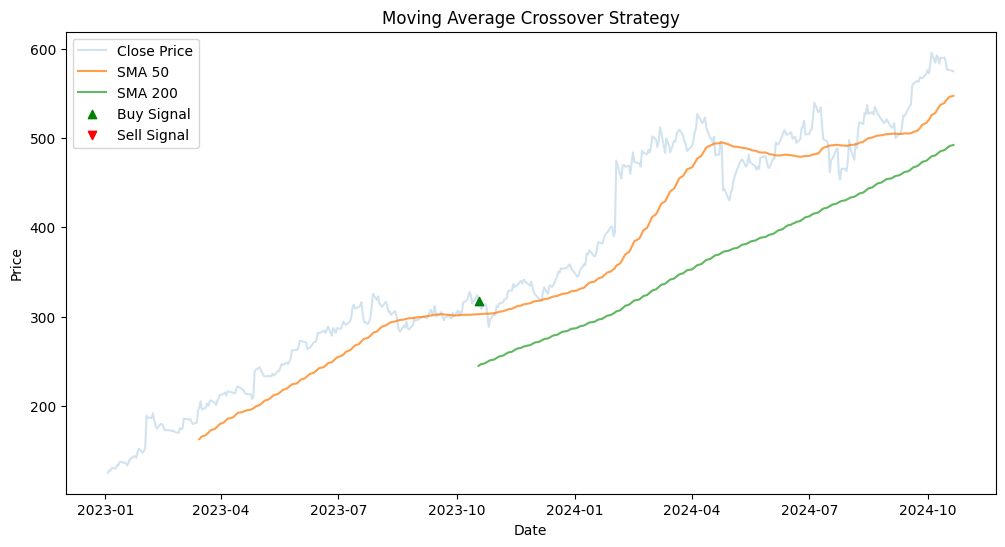

In [ ]:
import matplotlib.pyplot as plt

# Plot the closing price and moving averages
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price', alpha=0.2)
plt.plot(data['SMA_50'], label='SMA 50', alpha=0.75)
plt.plot(data['SMA_200'], label='SMA 200', alpha=0.75)

# Mark buy and sell signals
buy_signals = data[data['Position'] == 1]
sell_signals = data[data['Position'] == -1]
plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='g', label='Buy Signal', alpha=1)
plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='r', label='Sell Signal', alpha=1)

# Add labels and legend
plt.title('Moving Average Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


* yfinance: Used to fetch historical data for Apple Inc. (AAPL).
* pandas-ta: Used to calculate 50-day and 200-day SMAs.
* Signal generation: If SMA_50 > SMA_200, a buy signal is generated. If SMA_50 < SMA_200, a sell signal is generated.
* Position changes: The code tracks changes in signal to identify buy/sell points.

# Market Data, RSI, and Moving Averages with Signals and Plots

In [ ]:
# Fetch Market Data from yfinance
import yfinance as yf

# Download historical data for Apple Inc. (AAPL)
data = yf.download("AAPL", start="2023-01-01", end="2024-10-22")

# Display the first few rows of data
data.head(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,123.904633,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.182610,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.855095,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.412231,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,128.937302,70790800
2023-01-10,130.259995,131.259995,128.119995,130.729996,129.511887,63896200
2023-01-11,131.250000,133.509995,130.460007,133.490005,132.246170,69458900
2023-01-12,133.880005,134.259995,131.440002,133.410004,132.166916,71379600
2023-01-13,132.029999,134.919998,131.660004,134.759995,133.504333,57809700


In [ ]:
# Calculate SMA and RSI using pandas-ta
import pandas_ta as ta

# Calculate 50-day and 200-day Simple Moving Averages (SMA)
data['SMA_50'] = ta.sma(data['Close'], length=50)
data['SMA_200'] = ta.sma(data['Close'], length=200)

# Calculate RSI with a 14-day period
data['RSI_14'] = ta.rsi(data['Close'], length=14)

# Display the last few rows to confirm calculations
data[['Close', 'SMA_50', 'SMA_200', 'RSI_14']].head(10)


,Close,SMA_50,SMA_200,RSI_14
Date,,,,
2023-01-03,125.070000,NaN,NaN,NaN
2023-01-04,126.360001,NaN,NaN,NaN
2023-01-05,125.019997,NaN,NaN,NaN
2023-01-06,129.619995,NaN,NaN,NaN
2023-01-09,130.149994,NaN,NaN,NaN
2023-01-10,130.729996,NaN,NaN,NaN
2023-01-11,133.490005,NaN,NaN,NaN
2023-01-12,133.410004,NaN,NaN,NaN
2023-01-13,134.759995,NaN,NaN,NaN


In [ ]:
# Display the last few rows to confirm calculations
data[['Close', 'SMA_50', 'SMA_200', 'RSI_14']].tail(10)

,Close,SMA_50,SMA_200,RSI_14
Date,,,,
2024-10-08,225.770004,222.900001,198.23060,51.326480
2024-10-09,229.539993,223.114800,198.40490,56.357846
2024-10-10,229.039993,223.254000,198.58210,55.537877
2024-10-11,227.550003,223.437800,198.75460,53.060391
2024-10-14,231.300003,223.666600,198.94535,58.123579
2024-10-15,233.850006,224.158200,199.14670,61.189284
2024-10-16,231.779999,224.649200,199.34295,57.508752
2024-10-17,232.149994,225.095800,199.57550,57.995096
2024-10-18,235.000000,225.529600,199.82925,61.637483


In [ ]:
# Generate Buy (1) and Sell (-1) Signals based on SMA crossover
data['Signal'] = 0
data['Signal'][data['SMA_50'] > data['SMA_200']] = 1  # Buy Signal
data['Signal'][data['SMA_50'] < data['SMA_200']] = -1  # Sell Signal

# Detect position changes (buy/sell points)
data['Position'] = data['Signal'].diff()

# Display buy and sell signals
print("Buy Signals:")
print(data[data['Position'] == 1][['Close', 'SMA_50', 'SMA_200']].tail())

print("\nSell Signals:")
print(data[data['Position'] == -1][['Close', 'SMA_50', 'SMA_200']].tail())


Buy Signals:
                 Close      SMA_50   SMA_200
Date                                        
2023-10-18  175.839996  177.712801  169.0278

Sell Signals:
Empty DataFrame
Columns: [Close, SMA_50, SMA_200]
Index: []


<ipython-input-37-14dfa1b0cb98>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][data['SMA_50'] > data['SMA_200']] = 1  # Buy Signal
<ipython-input-37-14dfa1b0cb98>:3: SettingWithCopyWarning: 
A value is trying to be set on a 

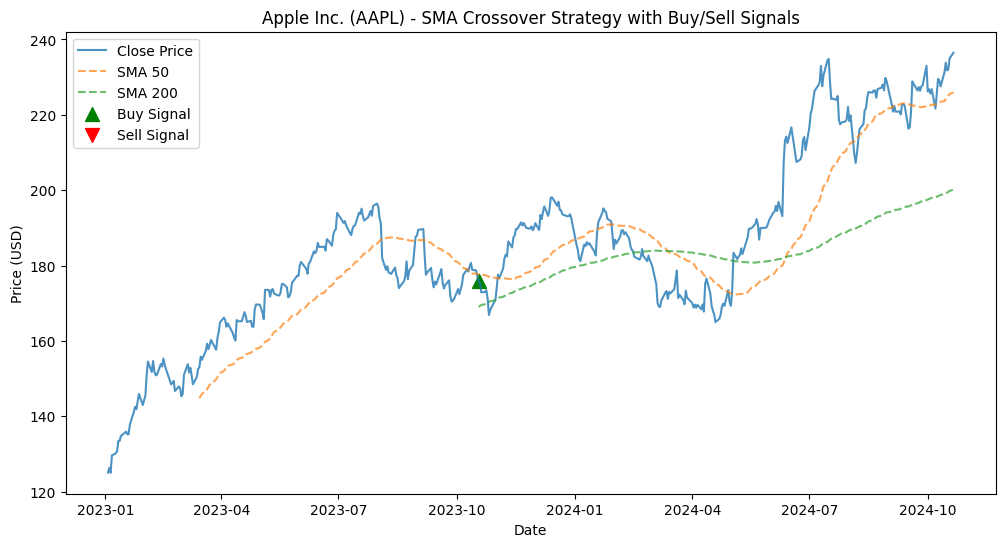

In [ ]:
import matplotlib.pyplot as plt

# Plot Close Price and SMA with Buy/Sell Signals
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price', alpha=0.8)
plt.plot(data['SMA_50'], label='SMA 50', linestyle='--', alpha=0.7)
plt.plot(data['SMA_200'], label='SMA 200', linestyle='--', alpha=0.7)

# Plot Buy Signals
buy_signals = data[data['Position'] == 1]
plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='g', label='Buy Signal', s=100)

# Plot Sell Signals
sell_signals = data[data['Position'] == -1]
plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='r', label='Sell Signal', s=100)

plt.title('Apple Inc. (AAPL) - SMA Crossover Strategy with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(loc='best')
plt.show()


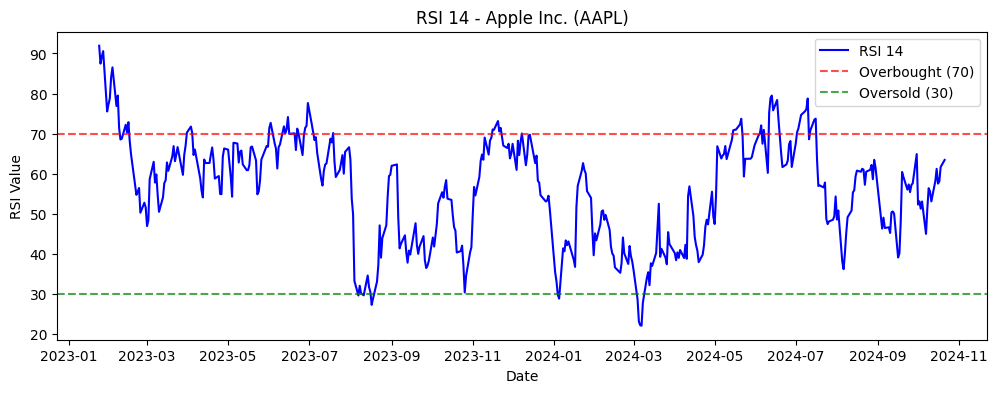

In [ ]:
# Plot RSI with Overbought (70) and Oversold (30) lines
plt.figure(figsize=(12, 4))
plt.plot(data['RSI_14'], label='RSI 14', color='b')

# Add overbought and oversold levels
plt.axhline(70, color='r', linestyle='--', alpha=0.7, label='Overbought (70)')
plt.axhline(30, color='g', linestyle='--', alpha=0.7, label='Oversold (30)')

plt.title('RSI 14 - Apple Inc. (AAPL)')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend(loc='best')
plt.show()


* Libraries Installed: We installed yfinance, pandas-ta, and matplotlib.
* Fetched Market Data: Downloaded Apple stock prices from yfinance.
* Indicators Calculated: Calculated SMA (50, 200) and RSI (14-day) using  pandas-ta.
* Trading Signals: Generated Buy/Sell signals using SMA crossover.
* Plots: Visualized stock price with SMA crossover signals and RSI with overbought/oversold lines.

# Comprehensive Trading Strategy Backtesting

## 1- Fetch Market Data

In [ ]:
import yfinance as yf

# Download historical data for Apple Inc. (AAPL)
data = yf.download("AAPL", start="2023-01-01", end="2024-10-22")

# Display the first few rows
data.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,123.904633,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.182610,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.855095,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.412231,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,128.937302,70790800


# 2- Calculate SMA and RSI

In [ ]:
import pandas_ta as ta

# Calculate 50-day and 200-day SMAs
data['SMA_50'] = ta.sma(data['Close'], length=50)
data['SMA_200'] = ta.sma(data['Close'], length=200)

# Calculate RSI with a 14-day period
data['RSI_14'] = ta.rsi(data['Close'], length=14)

# Display the last few rows to confirm calculations
data[['Close', 'SMA_50', 'SMA_200', 'RSI_14']].tail()


,Close,SMA_50,SMA_200,RSI_14
Date,,,,
2024-10-15,233.850006,224.1582,199.14670,61.189284
2024-10-16,231.779999,224.6492,199.34295,57.508752
2024-10-17,232.149994,225.0958,199.57550,57.995096
2024-10-18,235.000000,225.5296,199.82925,61.637483
2024-10-21,236.479996,225.9344,200.10210,63.411782


# 3- Generate Trading Signals

In [ ]:
# Initialize the Signal column
data['Signal'] = 0

# Buy Signal: SMA_50 > SMA_200 and RSI < 30 (oversold)
data['Signal'][(data['SMA_50'] > data['SMA_200']) & (data['RSI_14'] < 30)] = 1

# Sell Signal: SMA_50 < SMA_200 and RSI > 70 (overbought)
data['Signal'][(data['SMA_50'] < data['SMA_200']) & (data['RSI_14'] > 70)] = -1

# Detect position changes
data['Position'] = data['Signal'].diff()

# Display Buy/Sell signals
print("Buy Signals:")
print(data[data['Position'] == 1][['Close', 'SMA_50', 'SMA_200', 'RSI_14']].tail())

print("\nSell Signals:")
print(data[data['Position'] == -1][['Close', 'SMA_50', 'SMA_200', 'RSI_14']].tail())


Buy Signals:
                 Close      SMA_50    SMA_200     RSI_14
Date                                                    
2024-03-04  175.100006  186.958000  183.95730  28.585267
2024-05-22  190.899994  175.262600  180.88845  69.452007
2024-06-06  194.479996  179.062199  181.62770  67.468027
2024-06-10  193.119995  179.966599  181.78600  60.176144
2024-06-13  214.240005  182.485400  182.28240  79.485956

Sell Signals:
                 Close      SMA_50    SMA_200     RSI_14
Date                                                    
2024-03-11  172.750000  184.606199  183.87260  33.961404
2024-05-15  189.720001  173.279200  180.81945  70.816881
2024-06-05  195.869995  178.566800  181.53450  72.038674
2024-06-07  196.889999  179.533799  181.72600  70.913800
2024-06-11  207.149994  180.708999  181.93985  75.216149


<ipython-input-42-62cc7eab50ee>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][(data['SMA_50'] > data['SMA_200']) & (data['RSI_14'] < 30)] = 1
<ipython-input-42-62cc7eab50ee>:5: SettingWithCopyWarning: 
A value is trying to 

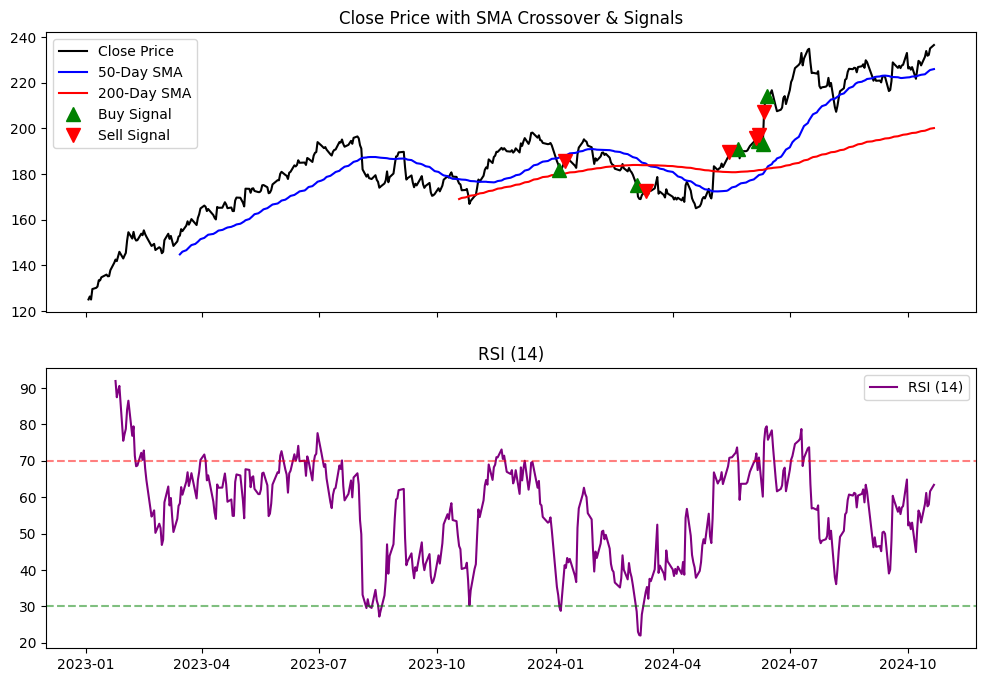

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axes for two plots: Price and RSI
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot Close price and SMAs on the first subplot
ax1.plot(data['Close'], label='Close Price', color='black')
ax1.plot(data['SMA_50'], label='50-Day SMA', color='blue')
ax1.plot(data['SMA_200'], label='200-Day SMA', color='red')

# Plot Buy/Sell signals on the Close price chart
ax1.plot(data[data['Position'] == 1].index,
         data[data['Position'] == 1]['Close'],
         '^', markersize=10, color='green', label='Buy Signal')

ax1.plot(data[data['Position'] == -1].index,
         data[data['Position'] == -1]['Close'],
         'v', markersize=10, color='red', label='Sell Signal')

ax1.set_title('Close Price with SMA Crossover & Signals')
ax1.legend()

# Plot RSI on the second subplot
ax2.plot(data['RSI_14'], label='RSI (14)', color='purple')
ax2.axhline(30, linestyle='--', color='green', alpha=0.5)  # Oversold threshold
ax2.axhline(70, linestyle='--', color='red', alpha=0.5)  # Overbought threshold

ax2.set_title('RSI (14)')
ax2.legend()

# Display the plot
plt.show()


# 4- Backtesting the Strategy
We will create a backtesting function to evaluate the performance of the strategy.

In [ ]:
# Backtesting the Strategy
def backtest_strategy(data):
    initial_capital = 10000  # Initial investment capital
    shares = 0  # Number of shares owned
    cash = initial_capital  # Cash on hand
    portfolio_value = []  # Track portfolio value over time

    for i in range(len(data)):
        if data['Position'].iloc[i] == 1:  # Buy signal
            shares = cash // data['Close'].iloc[i]  # Buy as many shares as possible
            cash -= shares * data['Close'].iloc[i]
        elif data['Position'].iloc[i] == -1:  # Sell signal
            cash += shares * data['Close'].iloc[i]  # Sell all shares
            shares = 0  # Reset shares owned

        # Calculate total portfolio value
        total_value = cash + shares * data['Close'].iloc[i]
        portfolio_value.append(total_value)

    return portfolio_value

# Run the backtest
portfolio_value = backtest_strategy(data)

# Add portfolio value to DataFrame for visualization
data['Portfolio Value'] = portfolio_value

# Display the last few rows of the portfolio value
data[['Close', 'Portfolio Value']].tail()

,Close,Portfolio Value
Date,,
2024-10-15,233.850006,12224.309540
2024-10-16,231.779999,12116.669159
2024-10-17,232.149994,12135.908905
2024-10-18,235.000000,12284.109222
2024-10-21,236.479996,12361.069000


## Backtesting the Strategy with Risk Management and Leverage
Key Features of the Enhanced Backtesting Function

**Risk Management**:

risk_per_trade: Percentage of capital at risk for each trade (e.g., 1%).

**Leverage:**

leverage: Adjusts the position size based on leverage (e.g., 2x).

**Position Size Calculation:**

The number of shares to buy or sell is determined by the risk amount.

**Performance Metrics:**

Initial capital, final capital, total return, and percentage return are printed.

**Trade Logging:**

Each trade is logged and printed at the end.

In [ ]:
def backtest_strategy(data, initial_capital=10000, risk_per_trade=0.01, leverage=1):
    # Initialize variables
    capital = initial_capital
    position = 0
    entry_price = 0
    trades = []

    for index, row in data.iterrows():
        if row['Position'] == 1:  # Buy Signal
            # Calculate risk amount per trade
            risk_amount = capital * risk_per_trade
            # Calculate position size based on risk
            volume = risk_amount / (row['Close'] * (1/leverage))  # Adjust for leverage
            position += volume
            entry_price = row['Close']
            capital -= volume * entry_price  # Deduct capital
            trades.append(('Buy', row.name, entry_price, volume))

        elif row['Position'] == -1 and position > 0:  # Sell Signal
            capital += position * row['Close']  # Add to capital on sell
            trades.append(('Sell', row.name, row['Close'], position))
            position = 0  # Clear position after selling

    # Calculate final capital
    final_capital = capital + (position * data['Close'].iloc[-1] if position > 0 else 0)
    total_return = final_capital - initial_capital

    print(f"Initial Capital: ${initial_capital:.2f}")
    print(f"Final Capital: ${final_capital:.2f}")
    print(f"Total Return: ${total_return:.2f} ({(total_return / initial_capital) * 100:.2f}%)")

    return trades

# Run the backtest
trades = backtest_strategy(data, initial_capital=10000, risk_per_trade=0.01, leverage=2)

# Display the trades
for trade in trades:
    print(trade)


Initial Capital: $10000.00
Final Capital: $10044.37
Total Return: $44.37 (0.44%)
('Buy', Timestamp('2024-01-04 00:00:00'), 181.91000366210938, 1.0994447582525042)
('Sell', Timestamp('2024-01-08 00:00:00'), 185.55999755859375, 1.0994447582525042)
('Buy', Timestamp('2024-03-04 00:00:00'), 175.10000610351562, 1.142662777606412)
('Sell', Timestamp('2024-03-11 00:00:00'), 172.75, 1.142662777606412)
('Buy', Timestamp('2024-05-22 00:00:00'), 190.89999389648438, 1.0478080693474232)
('Sell', Timestamp('2024-06-05 00:00:00'), 195.8699951171875, 1.0478080693474232)
('Buy', Timestamp('2024-06-06 00:00:00'), 194.47999572753906, 1.0290554843037019)
('Sell', Timestamp('2024-06-07 00:00:00'), 196.88999938964844, 1.0290554843037019)
('Buy', Timestamp('2024-06-10 00:00:00'), 193.1199951171875, 1.0365591953284097)
('Sell', Timestamp('2024-06-11 00:00:00'), 207.14999389648438, 1.0365591953284097)
('Buy', Timestamp('2024-06-13 00:00:00'), 214.24000549316406, 0.9357317031612818)


# Backtesting the Strategy with Risk Management and Performance Metrics
In this section, we will implement backtesting considering leverage, volume, transaction costs, slippage, and performance metrics.

In [ ]:
import numpy as np

def backtest_strategy(data, initial_capital=10000, risk_per_trade=0.01, leverage=2, transaction_cost=0.001):
    capital = initial_capital
    position_size = 0  # Track the size of the current position
    positions = []     # Store buy prices for open positions
    returns = []       # Track individual trade returns

    for i in range(len(data)):
        # Handle Buy Signal
        if data['Position'].iloc[i] == 1 and position_size == 0:  # Open a new position only if none exists
            # Calculate the amount to invest based on risk management
            risk_amount = capital * risk_per_trade
            position_size = (risk_amount * leverage) / data['Close'].iloc[i]
            positions.append(data['Close'].iloc[i])  # Record the buy price

            # Deduct the capital considering the transaction cost
            capital -= position_size * data['Close'].iloc[i] * (1 + transaction_cost)

        # Handle Sell Signal
        elif data['Position'].iloc[i] == -1 and len(positions) > 0:  # Sell only if there’s an open position
            buy_price = positions.pop()  # Remove the last opened position

            # Calculate the profit/loss for this trade
            trade_return = (data['Close'].iloc[i] - buy_price) * position_size
            returns.append(trade_return)

            # Add back the capital after selling (with transaction cost)
            capital += position_size * data['Close'].iloc[i] * (1 - transaction_cost)

            # Reset position size after the trade is closed
            position_size = 0

    # Final capital after all trades
    final_capital = capital + sum(returns)

    # Performance Metrics
    total_returns = (final_capital - initial_capital) / initial_capital * 100
    win_rate = sum(r > 0 for r in returns) / len(returns) * 100 if returns else 0
    max_drawdown = (min(returns) / initial_capital) * 100 if returns else 0

    # Sharpe Ratio
    daily_returns = np.array(returns) / initial_capital
    sharpe_ratio = np.mean(daily_returns) / np.std(daily_returns) if np.std(daily_returns) != 0 else 0

    return {
        "Final Capital": final_capital,
        "Total Returns (%)": total_returns,
        "Win Rate (%)": win_rate,
        "Max Drawdown (%)": max_drawdown,
        "Sharpe Ratio": sharpe_ratio
    }

# Example: Ensure 'data' contains valid 'Position' column (buy/sell signals)
results = backtest_strategy(data)
print("Backtest Results:")
for key, value in results.items():
    print(f"{key}: {value}")


Backtest Results:
Final Capital: 9844.455345631735
Total Returns (%): -1.5554465436826468
Win Rate (%): 80.0
Max Drawdown (%): -0.02685156056985905
Sharpe Ratio: 0.8406291226979904


## Analysis of Key Metrics:
1. **Final Capital and Total Returns** (%)
Your initial capital was 10,000, but it decreased to 9,844.45, resulting in a negative return of -1.56%.
Even though the win rate is high, the strategy failed to generate profit. This suggests that the losses from a few trades outweighed the profits from winning trades, or your position sizes may have been too small to capture gains effectively.
2. **Win Rate** (%) – 80.0%
A win rate of 80% is excellent, meaning that 4 out of 5 trades were profitable.
However, the high win rate does not guarantee profitability. This might indicate:
Small profits on winning trades but large losses on losing trades.
Transaction costs and slippage may also have eaten into profits.
3. **Max Drawdown** (%) – -0.03%
Max drawdown of only 0.03% suggests that capital was well-preserved, and the strategy avoided significant losses.
This is a positive sign of good risk management, meaning the strategy avoided major market downturns or extreme losses during its run.
4. **Sharpe Ratio** – 0.84
A Sharpe Ratio of 0.84 indicates that the risk-adjusted returns are positive, though not particularly strong.
Typically, a Sharpe Ratio above 1 is considered good, while 0.84 suggests some consistency in returns but room for improvement.
It may indicate that the strategy could be too conservative, with missed opportunities for higher returns.
## Key Observations and Areas of Improvement:

1. **Risk/Reward Imbalance**:

* Although the win rate is high, the losses on losing trades seem to be greater than the gains from winning trades.
* Consider adjusting position sizing to ensure more favorable risk-to-reward ratios (e.g., 2:1 or 3:1).

2. **Transaction Costs Impact**:

* Transaction costs might have eaten into profits. If possible, reduce the number of trades or ensure larger profits per trade to overcome these costs.
Leverage Usage:

* The 2x leverage might not have been fully utilized to enhance returns. Test the strategy with higher leverage (e.g., 3x) if appropriate, but monitor for increased risk.

3. **Profit Target and Stop Loss** :

* Implement stop-loss or take-profit levels to limit losses and lock in profits earlier.
* The high win rate suggests that you are entering trades correctly, but trailing stop losses could help capture more profit.
Optimize Indicators:

* Consider optimizing the RSI thresholds (e.g., 25 and 75 instead of 30 and 70) or MA periods (e.g., 20/50 instead of 50/200) to fine-tune the strategy.

**Conclusion:**
Your strategy performs well in terms of win rate and low drawdown, which indicates good entry signals and risk management. However, the negative total return suggests that profit-taking strategies, position sizing, or transaction costs need optimization. Fine-tuning your indicators, adjusting leverage, or setting better risk-to-reward ratios will likely improve the strategy's profitability.

# 5- Libraries for Strategy Optimization in Python:
1. **Backtrader**:
A powerful framework for backtesting and optimizing trading strategies.
2. **optuna**:
A framework for hyperparameter optimization using advanced techniques like Tree-structured Parzen Estimators (TPE).
3. **PyPortfolioOpt**:
Helps with portfolio optimization and can complement your strategy by adjusting position sizes.

In [ ]:
!pip install backtrader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.5/419.5 kB 17.5 MB/s eta 0:00:00


## Steps for Optimizing a Trading Strategy:
### Define the Parameters:
Identify which parameters you want to optimize, such as:

* Moving Average lengths (e.g., short-term and long-term SMAs)
* RSI period
* Risk per trade
* Entry and exit thresholds

### Optimization Methods:

* Grid Search: Tests all possible combinations of parameters.

* Random Search: Selects random combinations of parameters.

* Genetic Algorithms: Simulates evolutionary processes to find the best parameters over time.

### Validate the Strategy:

* Cross-Validation: Splits the dataset into multiple parts to test the strategy on different sets.
* Walk-Forward Testing: Iteratively applies the strategy to new data as time progresses.


In [ ]:
import backtrader as bt

# Define the strategy class with parameters
class MyStrategy(bt.Strategy):
    params = (
        ('sma_short', 50),
        ('sma_long', 200),
    )

    def __init__(self):
        sma_short = bt.indicators.SMA(self.data.close, period=self.params.sma_short)
        sma_long = bt.indicators.SMA(self.data.close, period=self.params.sma_long)
        self.crossover = bt.indicators.CrossOver(sma_short, sma_long)

    def next(self):
        if self.crossover > 0:
            self.buy()
        elif self.crossover < 0:
            self.sell()

# Set up the backtesting engine
cerebro = bt.Cerebro()
cerebro.addstrategy(MyStrategy)

# Add data (e.g., using yfinance to fetch MSFT data)
import yfinance as yf
data = bt.feeds.PandasData(dataname=yf.download('MSFT', '2023-01-01', '2023-10-22'))
cerebro.adddata(data)

# Set initial cash
cerebro.broker.setcash(10000)

# Optimize the strategy
cerebro.optstrategy(
    MyStrategy,
    sma_short=range(10, 60, 10),
    sma_long=range(100, 250, 50)
)

# Run the backtest
results = cerebro.run()


[*********************100%***********************]  1 of 1 completed


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.1 MB/s eta 0:00:00


In [ ]:
!pip install PyPortfolioOpt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 4.4 MB/s eta 0:00:00


# To optimize a trading strategy:

**Backtrader** for backtesting and parameter optimization.

**Optuna** for more advanced hyperparameter optimization.

**Cross-validation** and **Walk-Forward** Testing to ensure the strategy performs well on different datasets.

This will help to achieve better risk-adjusted returns by finding optimal parameters and reducing overfitting risks.

In [ ]:
import backtrader as bt
import yfinance as yf

# Define the strategy class with parameters for optimization
class MyStrategy(bt.Strategy):
    params = (
        ('sma_short', 50),
        ('sma_long', 200),
    )

    def __init__(self):
        self.sma_short = bt.indicators.SMA(self.data.close, period=self.params.sma_short)
        self.sma_long = bt.indicators.SMA(self.data.close, period=self.params.sma_long)
        self.crossover = bt.indicators.CrossOver(self.sma_short, self.sma_long)

    def next(self):
        if self.crossover > 0:
            self.buy()
        elif self.crossover < 0:
            self.sell()


In [ ]:
# Download stock data from yFinance
data = bt.feeds.PandasData(dataname=yf.download('AAPL', '2023-01-01', '2023-10-22'))

# Set up the Backtrader engine
cerebro = bt.Cerebro()
cerebro.adddata(data)
cerebro.broker.setcash(10000)  # Set the initial capital


[*********************100%***********************]  1 of 1 completed


In [ ]:
# Optimize the strategy: Test various SMA periods
cerebro.optstrategy(
    MyStrategy,
    sma_short=range(10, 60, 10),  # Short SMA from 10 to 50
    sma_long=range(100, 250, 50)  # Long SMA from 100 to 200
)

# Run the optimization
results = cerebro.run()

# Print the best strategy parameters and final capital
for strat in results:
    params = strat[0].params
    final_value = cerebro.broker.getvalue()
    print(f"Short SMA: {params.sma_short}, Long SMA: {params.sma_long}, Final Capital: ${final_value:.2f}")


Short SMA: 10, Long SMA: 100, Final Capital: $10000.00
Short SMA: 10, Long SMA: 150, Final Capital: $10000.00
Short SMA: 10, Long SMA: 200, Final Capital: $10000.00
Short SMA: 20, Long SMA: 100, Final Capital: $10000.00
Short SMA: 20, Long SMA: 150, Final Capital: $10000.00
Short SMA: 20, Long SMA: 200, Final Capital: $10000.00
Short SMA: 30, Long SMA: 100, Final Capital: $10000.00
Short SMA: 30, Long SMA: 150, Final Capital: $10000.00
Short SMA: 30, Long SMA: 200, Final Capital: $10000.00
Short SMA: 40, Long SMA: 100, Final Capital: $10000.00
Short SMA: 40, Long SMA: 150, Final Capital: $10000.00
Short SMA: 40, Long SMA: 200, Final Capital: $10000.00
Short SMA: 50, Long SMA: 100, Final Capital: $10000.00
Short SMA: 50, Long SMA: 150, Final Capital: $10000.00
Short SMA: 50, Long SMA: 200, Final Capital: $10000.00
